In [10]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline


for att in ['axes.labelsize', 'axes.titlesize', 'legend.fontsize',
            'legend.fontsize', 'xtick.labelsize', 'ytick.labelsize']:
    plt.rcParams[att] = 13

from altaipony.ffd import FFD
import logging
logger = logging.getLogger()
logger.setLevel(logging.CRITICAL)

import time
tstamp = time.strftime("%d_%m_%Y_%H_%M", time.localtime())

paperdir="/home/ekaterina/Documents/002_writing/flares-in-clusters-ii-draft/Flares_in_Clusters_with_K2_2/"

## Howard et al. (2019)

> Although these rates are high, they are constructed from
active stars of each spectral type and do not hold for inactive
stars. Loyd et al. (2018) finds inactive stars to be 10×less
active in the far-UV (FUV)-130 bandpass.

In [11]:
howard = pd.read_csv("howard2019_alphabeta.tsv",delimiter="\t")
howard.alpha = howard.alpha + 1.
howard=howard[howard.SpT!="K7"]
howard["c"] = ["blue","springgreen", "lime","lightseagreen","teal","lightblue"]
howard

,index,SpT,alpha,beta,c
0,1,K5,2.34,44.55,blue
2,3,M0,1.96,31.05,springgreen
3,4,M1,1.88,28.50,lime
4,5,M2,1.84,26.82,lightseagreen
5,6,M3,2.25,40.02,teal
6,7,M4,1.97,30.45,lightblue


## Lin et al. (2019)

> The stars had to be within 100 pc (M dwarfs) and 200 pc (K dwarfs) from the Earth

> The power-law indices of M and K dwarfs are $\gamma=1.82\pm0.02, \gamma=1.86\pm.02$, respectively, and these
are quite close to each other. Shibayama et al. (2013) showed
that the power-law index of G-type stars is $\gamma=2.2$ by binning
the data set while our result is $\gamma=2.01\pm0.03$. The flare
occurrence rate of M dwarfs is about once in 0.6 yr for
$E> 10^{33}$ erg and once in $6.5$ yr and $350$ yr for
superflares with $E$ of $10^{34}$ erg and $10^{35}$ erg, respectively.
In comparison, the K dwarfs’ flare occurrence rate is about
once in $4.7$ yr with $E> 10^{34}$ erg, namely, more
frequent than the M dwarfs’. The G dwarfs’ flare occurrence
rate of the flares with $E>10^{35}$ erg is also higher than
the M dwarfs’, it is about once in $320$ yr.

In [25]:
Galpha, Kalpha, Malpha = 2.01, 1.86, 1.82

def beta(alpha, E, f):
    return f * E**(alpha -1) * (alpha -1)

Gbeta = beta(Galpha, 1e35, 1/320)
Kbeta = beta(Kalpha, 1e34, 1/4.7)
Mbeta = beta(Malpha, 1e33, 1/.6)
lin = [(Galpha, Gbeta, "G", "peru"), (Kalpha, Kbeta, "K", "firebrick"), (Malpha, Mbeta, "M", "maroon")]
#Mbeta2 = beta(Malpha, 1e34, 1/6.5)
#Mbeta3 = beta(Malpha, 1e35, 1/350)
#Gbeta, Kbeta, Mbeta, Mbeta2, Mbeta3

In [13]:
df = pd.read_csv("tables/cluster_SpT_alphabeta.csv")
dffull = pd.read_csv("tables/full_sample_alphabeta.csv").set_index("Unnamed: 0")
ilin = pd.read_csv("old_beta_ilin.csv")

In [23]:
ilin = ilin[ilin['T_max (K)'] != 7000]
ilin

,Unnamed: 0,cluster,T_min (K),T_max (K),number of light curves in bin,number of flares in bin,alpha,alpha_err,log10 beta,log10 beta_err,log10 beta2,log10 beta2_high_err,log10 beta2_low_err,detection threshold (erg)
1,1,M44,3000,3249,206,22,2.047590,0.027088,34.507341,0.909730,32.912272,0.288394,1.315928,1.131709e+33
2,2,M44,3250,3499,164,55,2.131035,0.054078,37.506428,1.795637,33.144622,0.198772,0.377161,5.715820e+32
3,3,M44,3500,3749,152,88,2.021523,0.030490,34.008827,1.008250,33.287401,0.126739,0.179718,3.611787e+32
4,4,M44,3750,4000,47,13,2.012838,0.079076,33.399954,2.614073,32.970605,0.201903,0.388983,3.995716e+32
6,6,M45,3000,3249,224,94,2.051605,0.019852,34.899746,0.655397,33.187810,0.146666,0.223114,4.781664e+32
7,7,M45,3250,3499,195,262,2.137402,0.027988,38.374125,0.929000,33.790751,0.085285,0.106228,5.870064e+32
8,8,M45,3500,3749,130,179,2.369090,0.036633,46.133631,1.218530,33.840220,0.101138,0.132075,7.601244e+32
9,9,M45,3750,4000,47,53,2.149913,0.066052,39.070992,2.204914,34.040511,0.127482,0.181198,9.872670e+32


In [15]:
alpha_en = float(dffull.loc["alpha_en","0"])
beta_en = float(dffull.loc["beta_en","0"])

In [16]:
# Shiabayama 2013
# Superflare defined as >1e33 erg

# all
alpha_shibayama = 2.2
beta_shibayama = 2.3e-3 * (alpha_shibayama - 1.) * np.power(1e33, alpha_shibayama - 1)

# most active: average frequency of superflares on the 9 most active G-type dwarfs, 
# whose superflare occurrence rate is more than once in 10 days.
alpha_shibayama_active = alpha_shibayama
beta_shibayama_active = 36.525 * (alpha_shibayama - 1.) * np.power(1e33, alpha_shibayama - 1)

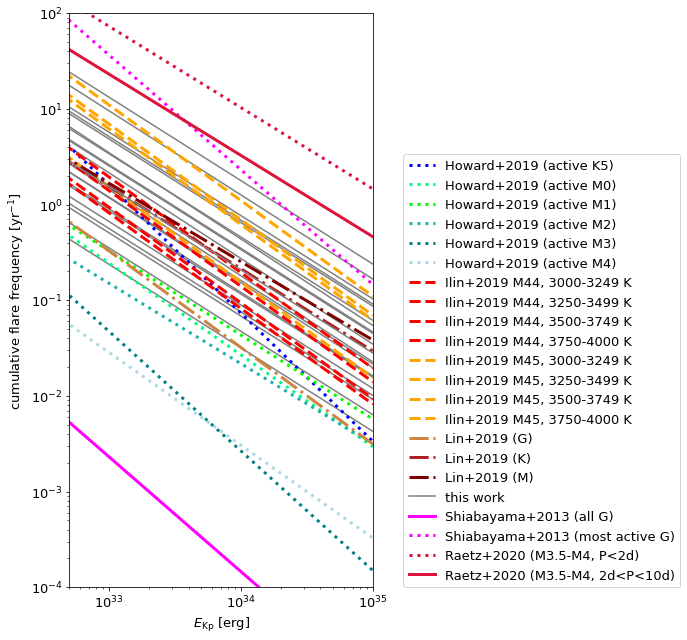

In [29]:
fig, ax = plt.subplots(1,figsize=(10,9))
ed = np.linspace(1e32,1e35,3)

for label, row in df.iterrows():
    ffd = FFD(alpha=row.alpha_en, beta=row.beta_en)
    ffd.ed = ed
    ffd.plot_powerlaw(ax, c="grey")
    
for label, row in howard.iterrows():
    ffd = FFD(alpha=row.alpha, beta=np.power(10,row.beta))
    ffd.ed = ed
    ffd.plot_powerlaw(ax, c=row.c, label=f"Howard+2019 (active {row.SpT})",
                      linestyle="dotted", linewidth=3)
    
for label, row in ilin.iterrows():
    ffd = FFD(alpha=2, beta=np.power(10,row["log10 beta2"]),)
    ffd.ed = ed
    if row["cluster"] == "M44":
        c="r"
    if row["cluster"] == "M45":
        c="orange"
    ffd.plot_powerlaw(ax, c=c,linewidth=3,linestyle="dashed",
              label=f"Ilin+2019 {row['cluster']}, {row['T_min (K)']}-{row['T_max (K)']} K ")
#     ffd = FFD()
#     ffd.ed = ed
#     ffd.plot_powerlaw(ax, c="g")

for alpha, beta, label, c in lin:
    ffd = FFD(alpha=alpha, beta=beta)
    ffd.ed = ed
    ffd.plot_powerlaw(ax, c=c, linestyle="dashdot",
                      label=f"Lin+2019 ({label})", linewidth=3)
   

ffd = FFD(alpha=alpha_en, beta=beta_en)
ffd.ed = ed
ffd.plot_powerlaw(ax, c="grey", label="this work")

# ffd = FFD(alpha=2, beta=np.power(10,34))
# ffd.ed = ed
# ffd.plot_powerlaw(ax, c="magenta",linewidth=5, label="Yang+2017 (M)")

ffd = FFD(alpha=alpha_shibayama, beta=beta_shibayama)
ffd.ed = ed
ffd.plot_powerlaw(ax, c="magenta",linewidth=3, label="Shiabayama+2013 (all G)")

ffd = FFD(alpha=alpha_shibayama_active, beta=beta_shibayama_active)
ffd.ed = ed
ffd.plot_powerlaw(ax, c="magenta",linewidth=3, linestyle="dotted", label="Shiabayama+2013 (most active G)")

ffd = FFD(alpha=alpha_raetz, beta=beta_raetz_fastrot)
ffd.ed = ed
ffd.plot_powerlaw(ax, c="crimson",linewidth=3, linestyle="dotted", label="Raetz+2020 (M3.5-M4, P<2d)")

ffd = FFD(alpha=alpha_raetz, beta=beta_raetz_slowrot)
ffd.ed = ed
ffd.plot_powerlaw(ax, c="crimson",linewidth=3, label="Raetz+2020 (M3.5-M4, 2d<P<10d)")

    
plt.yscale("log")
plt.xscale("log")
plt.ylim(1e-4,1e2)
plt.xlim(5e32,1e35)
plt.ylabel(r"cumulative flare frequency [yr$^{-1}$]")
plt.xlabel(r"$E_\mathrm{Kp}$ [erg]")
plt.legend(loc=(1.1,0))
plt.tight_layout()
plt.savefig(f"plots/{tstamp}_discussion_FFDs.png", dpi=300)
plt.savefig(f"{paperdir}pics/FFDs/discussion_FFDs.png", dpi=300);

In [26]:
# Raetz et al. (2020)
alpha_raetz = 1.85
beta_raetz_fastrot = beta(alpha_raetz, 1e33, np.power(10,-.7)*365.25 )
beta_raetz_slowrot = beta(alpha_raetz, 1e33, np.power(10,-1.2)*365.25 )

## Guenther et al. (2020) 

> We find no significant difference between stars with and
without detected rotation modulation. This is somewhat
surprising given that fast rotating M dwarfs are suggested to
flare more frequently. Moreover, we find that the average flare
energy per star depends on the effect